#InfoaidTech
##Credit Card Fraud Detection
**name: Vishal Bind**

**Domain: Machine Learning intern**

In [31]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [32]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [33]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
71391,54278,1.039072,-0.213656,0.431251,0.918611,-0.621456,-0.667224,0.134553,-0.181427,0.400214,...,-0.167499,-0.510090,-0.079011,0.444677,0.428995,0.256921,-0.039011,0.031128,106.85,0.0
71392,54279,-5.084290,-4.002881,1.329865,-0.573442,-0.690674,0.019033,0.844001,-0.466913,0.381563,...,-0.962575,0.808686,2.249283,0.165161,1.093631,-0.235500,-0.055029,-0.272360,314.31,0.0
71393,54280,1.441869,-0.411978,-0.357381,-0.981390,-0.244335,-0.292055,-0.242842,-0.091250,-1.241760,...,-0.832744,-2.041536,0.134713,-0.883851,0.100577,0.680045,-0.083669,-0.013649,11.97,0.0
71394,54280,-0.441533,0.363429,1.434158,-2.116500,-0.582532,-1.354317,0.886887,-0.335278,0.949012,...,-0.028278,0.146103,-0.101250,0.781919,0.258258,-0.843708,0.155215,0.121668,57.01,0.0
71395,54281,1.236141,0.256586,0.175963,0.504282,-0.197600,-0.569588,-0.058326,-0.005874,-0.125664,...,-0.263713,-0.821591,0.081703,-0.056701,0.212892,NaN,NaN,NaN,NaN,NaN


In [34]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71396 entries, 0 to 71395
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    71396 non-null  int64  
 1   V1      71396 non-null  float64
 2   V2      71396 non-null  float64
 3   V3      71396 non-null  float64
 4   V4      71396 non-null  float64
 5   V5      71396 non-null  float64
 6   V6      71396 non-null  float64
 7   V7      71396 non-null  float64
 8   V8      71396 non-null  float64
 9   V9      71396 non-null  float64
 10  V10     71396 non-null  float64
 11  V11     71396 non-null  float64
 12  V12     71396 non-null  float64
 13  V13     71396 non-null  float64
 14  V14     71396 non-null  float64
 15  V15     71396 non-null  float64
 16  V16     71396 non-null  float64
 17  V17     71396 non-null  float64
 18  V18     71396 non-null  float64
 19  V19     71396 non-null  float64
 20  V20     71396 non-null  float64
 21  V21     71396 non-null  float64
 22

# Exploratory Data Analysis

In [35]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [6]:
# distribution of Normal transactions & fraudulent transactions
data['Class'].value_counts()

0.0    31677
1.0      102
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

Text(0, 0.5, 'Frequency')

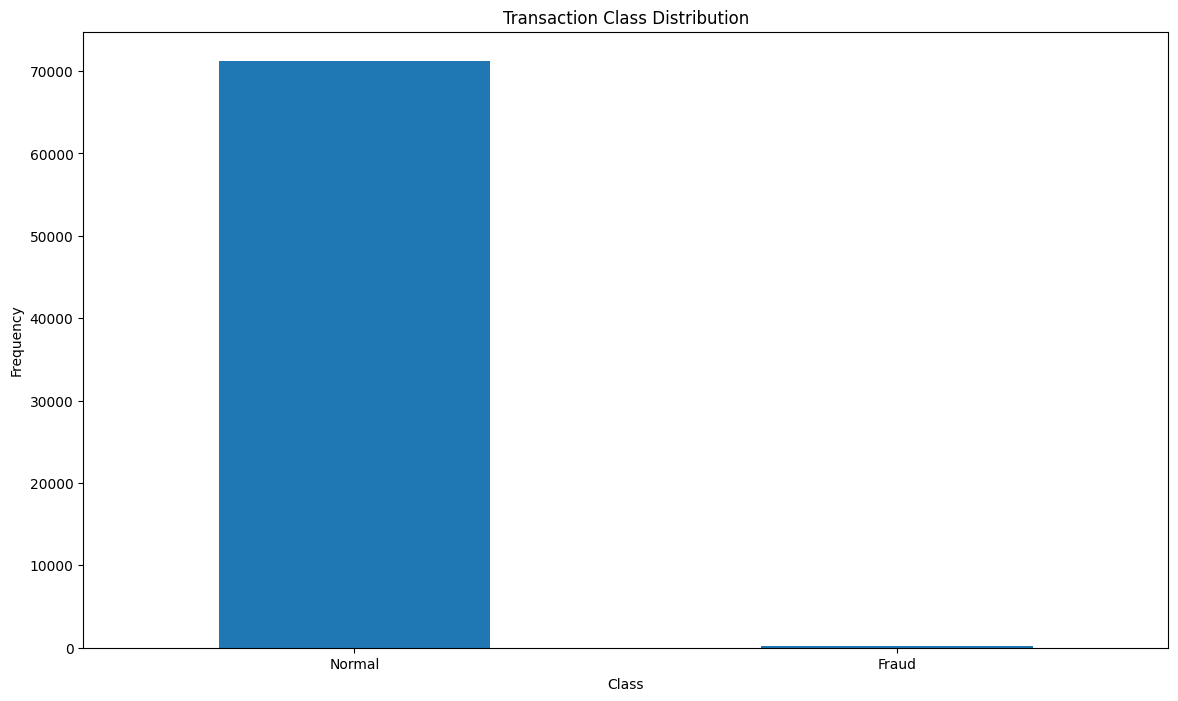

In [36]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [8]:
## Get the Fraud and the normal dataset

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [9]:
print(fraud.shape,normal.shape)


(102, 31) (31677, 31)


In [10]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     102.000000
mean       91.237451
std       248.270971
min         0.000000
25%         1.000000
50%         3.440000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [11]:
normal.Amount.describe()


count    31677.000000
mean        81.082407
std        223.072655
min          0.000000
25%          6.870000
50%         20.000000
75%         73.610000
max       7879.420000
Name: Amount, dtype: float64

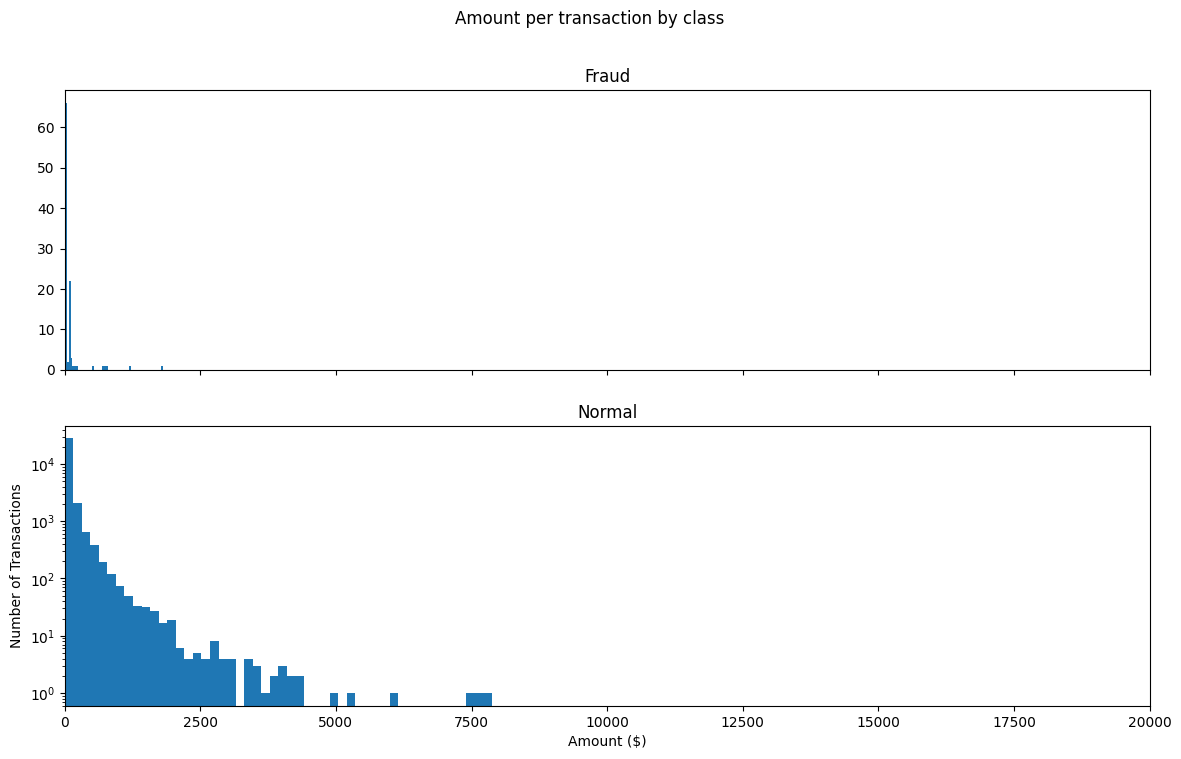

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

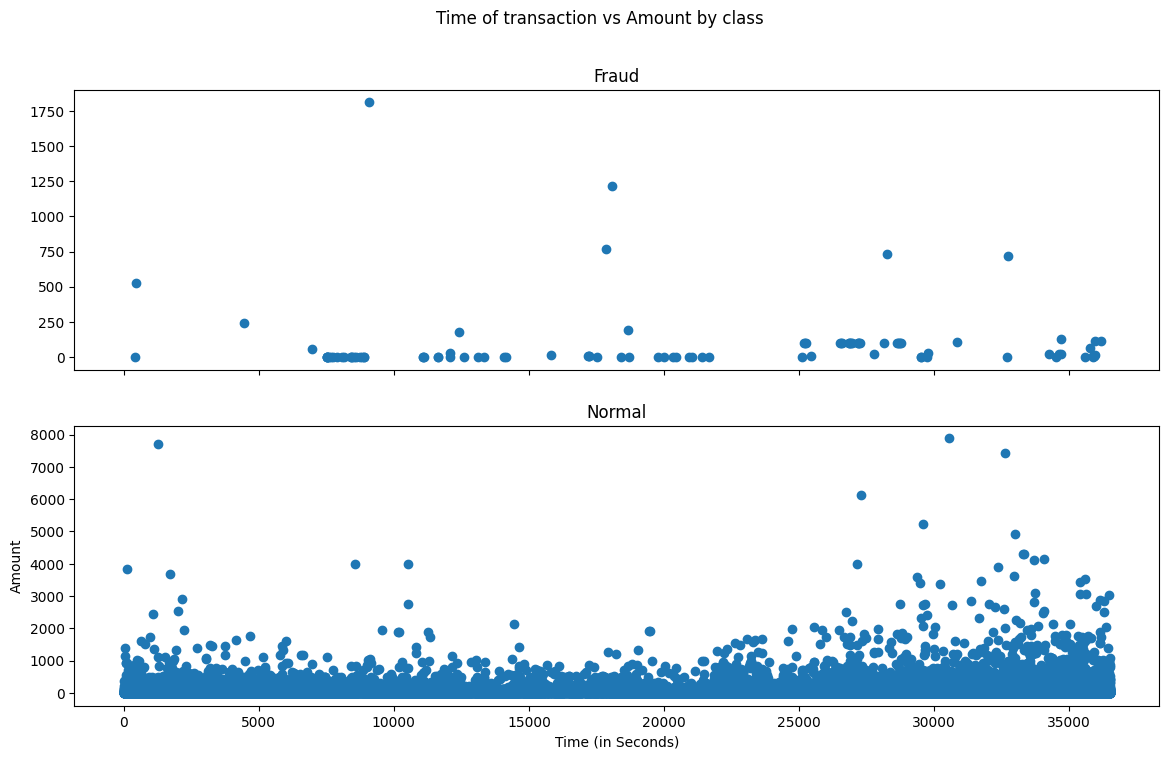

In [37]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [14]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(3178, 31)

In [15]:
data.shape

(31780, 31)

In [16]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [17]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.004424778761061947
Fraud Cases : 14
Valid Cases : 3164


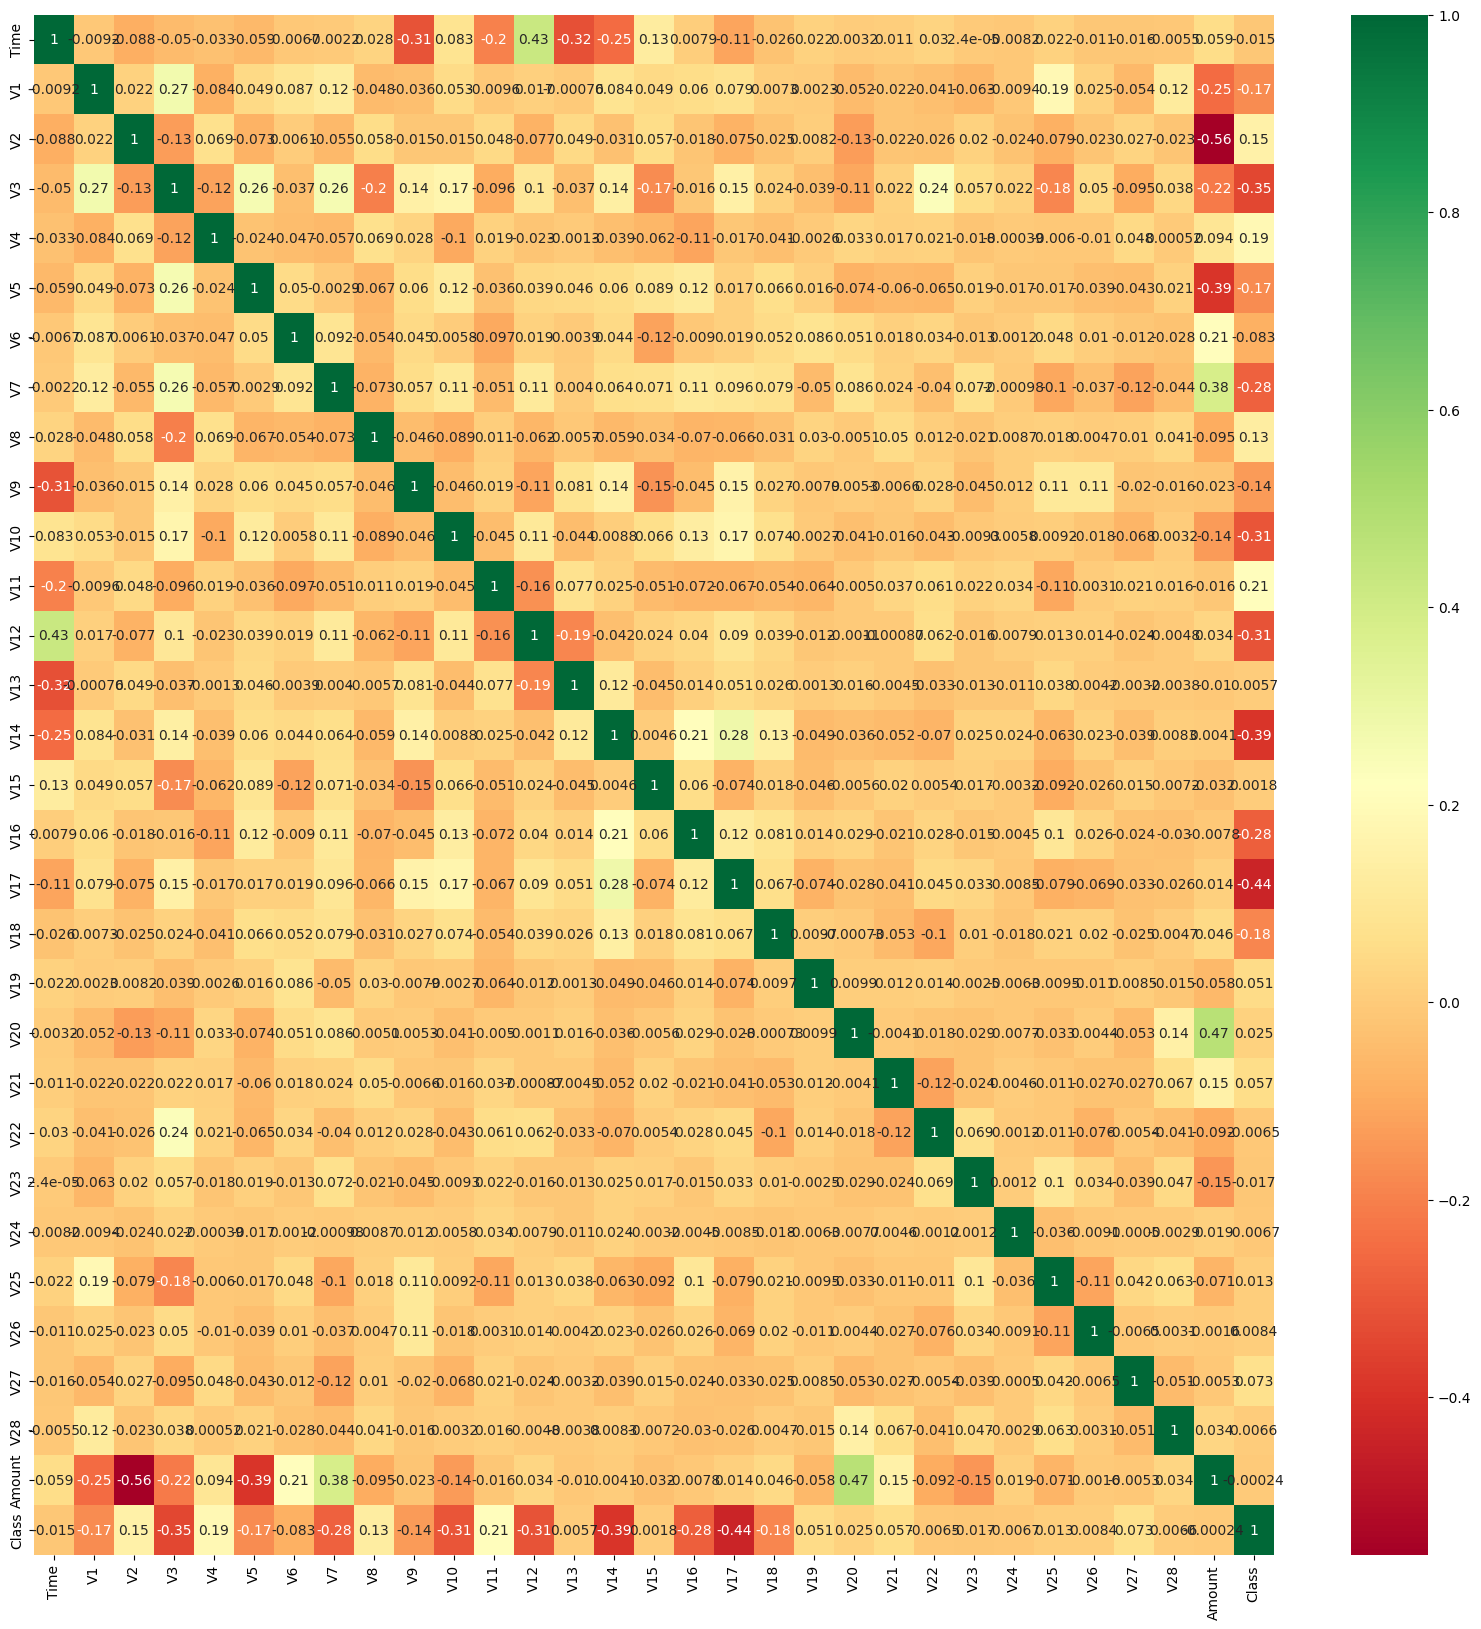

In [38]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(3178, 30)
(3178,)


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [21]:
x_scaler[-1]

array([-1.47745886,  0.79893258, -0.40973281, -0.00267907, -0.48262789,
       -0.49501282, -0.49918565, -0.47034615, -0.10116307,  0.26562314,
        0.29040145,  0.23004511, -1.76604769,  0.35758713,  0.89762474,
        0.40210392,  0.94935805,  0.87699118, -1.70200777,  0.1329432 ,
       -0.13230862, -0.28253035, -0.63825839,  0.51173574, -0.06977365,
       -0.10454883, -0.99368306, -0.05924603,  0.01078786, -0.29103387])

# Split the data into Training data & Testing Data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [23]:
print(X.shape, X_train.shape, X_test.shape)


(3178, 30) (2542, 30) (636, 30)


# Model Training

# Logistic Regression

In [24]:
model = LogisticRegression()

In [25]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

# Accuracy Score

In [39]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
print('Accuracy on Training data : ', training_data_accuracy)


Accuracy on Training data :  0.9988198269079465


In [28]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9984276729559748
